# **CALCULO TAXA DE RETORNO DE CARTEIRA**

In [1]:
# Import das bibliotecas e módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# IMPORT DAS EMPRESAS PELO SEU TICKER: PG, IBM, FORD E GE
tickers = ['PG', 'IBM', 'F', 'GE']
dados = pd.DataFrame()
for tick in tickers:
    dados[tick] = wb.DataReader(tick, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6553 entries, 1995-01-03 to 2021-01-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6553 non-null   float64
 1   IBM     6553 non-null   float64
 2   F       6553 non-null   float64
 3   GE      6553 non-null   float64
dtypes: float64(4)
memory usage: 256.0 KB


In [4]:
dados.head()

,PG,IBM,F,GE
Date,,,,
1995-01-03,8.215732,11.250346,4.380183,4.122630
1995-01-04,8.149876,11.345690,4.498034,4.122630
1995-01-05,8.034625,11.288483,4.458752,4.132737
1995-01-06,8.051086,11.460097,4.458752,4.112525
1995-01-09,8.018162,11.517305,4.537320,4.072110


In [5]:
dados.tail()

,PG,IBM,F,GE
Date,,,,
2021-01-05,138.699997,126.139999,8.650,10.77
2021-01-06,140.160004,129.289993,8.840,11.36
2021-01-07,138.850006,128.990005,9.060,11.27
2021-01-08,138.789993,128.529999,9.000,11.34
2021-01-11,138.100006,128.619995,9.145,11.40


In [6]:
# NORMALIZANDO OS DADOS PARA 100
dados.iloc[0]

PG      8.215732
IBM    11.250346
F       4.380183
GE      4.122630
Name: 1995-01-03 00:00:00, dtype: float64

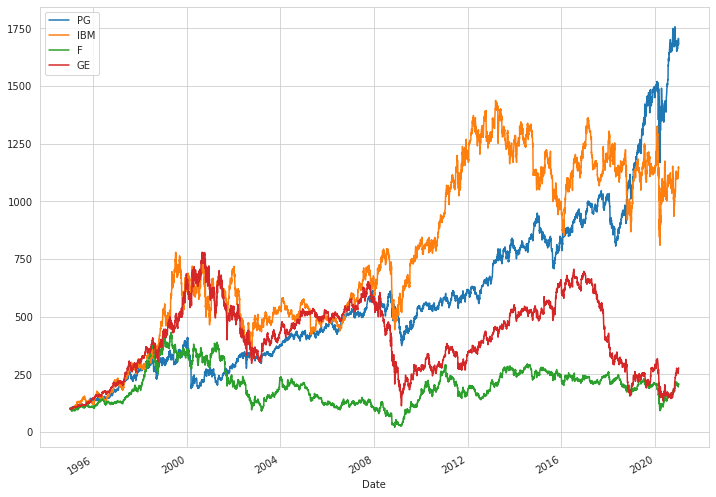

In [7]:
(dados / dados.iloc[0] * 100).plot(figsize=(12,9))

# **CALCULO TAXA DE RETORNO SIMPLES DE UM PORTIFOLIO DE SECURITIES**

In [8]:
# CRIANDO MATRIZ PARA RECEBER OS DADOS ANTES DE SEREM MULTIPLICADOS POR 25%
matriz_port = (dados / dados.shift(1)) -1
matriz_port.head()

,PG,IBM,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.008475,0.026905,0.000000
1995-01-05,-0.014141,-0.005042,-0.008733,0.002452
1995-01-06,0.002049,0.015203,0.000000,-0.004891
1995-01-09,-0.004089,0.004992,0.017621,-0.009827


In [9]:
# array do peso/porcentagem das açoes
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [10]:
# Calculando a media de retorno anual atraves da matrix criada anteriormente
annual_returns = matriz_port.mean() * 250
annual_returns

PG     0.133281
IBM    0.131968
F      0.107539
GE     0.090105
dtype: float64

In [11]:
np.dot(annual_returns, weights)

0.11572349945342936

In [12]:
port_1 = (str(round(np.dot(annual_returns, weights), 5) * 100) + '%')

In [13]:
port_1

'11.572000000000001%'

In [14]:
# CRIANDO NOVA CARTEIRA COM NOVOS PESOS PARA CADA AÇÃO
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [15]:
port_2 = (str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%')

In [16]:
# COMPARANDO OS PORTIFOLIOS:
print(port_1)
print("\n")
print(port_2)

11.572000000000001%


12.674%


In [17]:
# PODEMOS CONCLUIR QUE A SEGUNDA CARTEIRA TEM O RETORNO MAIOR:
# PORT_2